In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, cross_validate
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

In [2]:
X_train = pd.read_csv("data/train.csv")
X_test = pd.read_csv("data/test.csv")

In [3]:
X_train[:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X_test[:5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


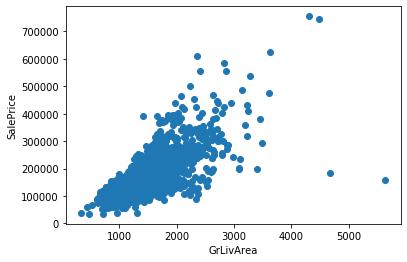

In [5]:
plt.figure()
plt.scatter(X_train['GrLivArea'], X_train['SalePrice'])
plt.ylabel("SalePrice")
plt.xlabel("GrLivArea")
plt.show()

In [6]:
# remove outliers according to the original paper
# Although all known errors were corrected in the data, no
# observations have been removed due to unusual values and all final residential sales
# from the initial data set are included in the data presented with this article. There are
# five observations that an instructor may wish to remove from the data set before giving
# it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these
# points). Three of them are true outliers (Partial Sales that likely don’t represent actual
# market values) and two of them are simply unusual sales (very large houses priced
# relatively appropriately). I would recommend removing any houses with more than
# 4000 square feet from the data set (which eliminates these five unusual observations)
# before assigning it to students

# only remove true outliers in the training set
X_train[(X_train['GrLivArea'] > 4000) & (X_train['SalePrice'] < 300000)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [7]:
X_train.drop(X_train[(X_train['GrLivArea'] > 4000) & (X_train['SalePrice'] < 300000)].index, inplace=True)

In [8]:
y_train = X_train["SalePrice"]
X_train.drop("SalePrice", axis=1, inplace=True)
train_ID = X_train["Id"]
test_ID = X_test["Id"]
X_train.drop("Id", axis=1, inplace=True)
X_test.drop("Id", axis=1, inplace=True)

In [9]:
X_train[:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [10]:
X_test[:5]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
X_train.shape

(1458, 79)

In [12]:
X_test.shape

(1459, 79)

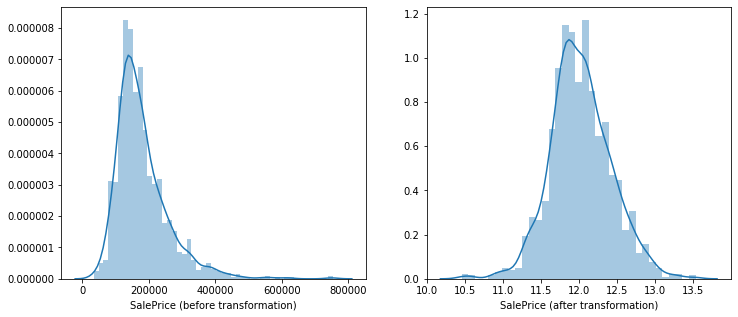

In [13]:
# log transform y
plt.figure(figsize=(12, 5))
plt.subplot(121)
sns.distplot(y_train)
plt.xlabel("SalePrice (before transformation)")
plt.subplot(122)
sns.distplot(np.log1p(y_train))
plt.xlabel("SalePrice (after transformation)")
plt.show()

In [14]:
y_train = np.log1p(y_train)

In [15]:
num_train = X_train.shape[0]
all_data = pd.concat((X_train, X_test), ignore_index=True)

In [16]:
# drop redundant feature
all_data["Utilities"].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [17]:
all_data.drop("Utilities", axis=1, inplace=True)

In [18]:
missing_ratio = pd.isnull(all_data).sum() / all_data.shape[0] * 100
missing_ratio = missing_ratio[missing_ratio != 0]
# print(missing_ratio.sort_values(ascending=False))
print(missing_ratio)

MSZoning         0.137127
LotFrontage     16.660953
Alley           93.212204
Exterior1st      0.034282
Exterior2nd      0.034282
MasVnrType       0.822763
MasVnrArea       0.788481
BsmtQual         2.776826
BsmtCond         2.811107
BsmtExposure     2.811107
BsmtFinType1     2.708262
BsmtFinSF1       0.034282
BsmtFinType2     2.742544
BsmtFinSF2       0.034282
BsmtUnfSF        0.034282
TotalBsmtSF      0.034282
Electrical       0.034282
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
KitchenQual      0.034282
Functional       0.068564
FireplaceQu     48.680151
GarageType       5.382242
GarageYrBlt      5.450806
GarageFinish     5.450806
GarageCars       0.034282
GarageArea       0.034282
GarageQual       5.450806
GarageCond       5.450806
PoolQC          99.691464
Fence           80.425094
MiscFeature     96.400411
SaleType         0.034282
dtype: float64


In [19]:
# missing values with clear definitions
# Alley: NA No alley access
all_data["Alley"] = all_data["Alley"].fillna("None")
# BsmtQual: NA No Basement
all_data["BsmtQual"] = all_data["BsmtQual"].fillna("None")
# BsmtCond: NA No Basement
all_data["BsmtCond"] = all_data["BsmtCond"].fillna("None")
# BsmtExposure: NA No Basement
all_data["BsmtExposure"] = all_data["BsmtExposure"].fillna("None")
# BsmtQual: NA No Basement
all_data["BsmtFinType1"] = all_data["BsmtFinType1"].fillna("None")
# BsmtFinSF1: NA No Basement
all_data["BsmtFinSF1"] = all_data["BsmtFinSF1"].fillna(0)
# BsmtQual: NA No Basement
all_data["BsmtFinType2"] = all_data["BsmtFinType2"].fillna("None")
# BsmtFinSF1: NA No Basement
all_data["BsmtFinSF2"] = all_data["BsmtFinSF2"].fillna(0)
# BsmtUnfSF: NA No Basement
all_data["BsmtUnfSF"] = all_data["BsmtUnfSF"].fillna(0)
# TotalBsmtSF: NA No Basement
all_data["TotalBsmtSF"] = all_data["TotalBsmtSF"].fillna(0)
# BsmtFullBath: NA No Basement
all_data["BsmtFullBath"] = all_data["BsmtFullBath"].fillna(0)
# BsmtHalfBath: NA No Basement
all_data["BsmtHalfBath"] = all_data["BsmtHalfBath"].fillna(0)
# Functional: Home functionality (Assume typical unless deductions are warranted)
all_data["Functional"] = all_data["Functional"].fillna("Typ")  # XXX: Is this correct? at ;east it's the most frequent option
# FireplaceQu: NA No Fireplace
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
# GarageType: NA No Garage
all_data["GarageType"] = all_data["GarageType"].fillna("None")
# GarageYrBlt: NA No Garage
all_data["GarageYrBlt"] = all_data["GarageYrBlt"].fillna(0)  # XXX: Is 0 a good choice?
# GarageFinish: NA No Garage
all_data["GarageFinish"] = all_data["GarageFinish"].fillna("None")
# GarageCars: NA No Garage
all_data["GarageCars"] = all_data["GarageCars"].fillna(0)
# GarageArea: NA No Garage
all_data["GarageArea"] = all_data["GarageArea"].fillna(0)
# GarageQual: NA No Garage
all_data["GarageQual"] = all_data["GarageQual"].fillna("None")
# GarageCond: NA No Garage
all_data["GarageCond"] = all_data["GarageCond"].fillna("None")
# PoolArea: NA No Pool
all_data["PoolArea"] = all_data["PoolArea"].fillna(0)
# PoolQC: NA No Pool
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
# Fence: NA No Fence
all_data["Fence"] = all_data["Fence"].fillna("None")
# MiscFeature: NA No MiscFeature
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [20]:
missing_ratio = pd.isnull(all_data).sum() / all_data.shape[0] * 100
missing_ratio = missing_ratio[missing_ratio != 0]
# print(missing_ratio.sort_values(ascending=False))
print(missing_ratio)

MSZoning        0.137127
LotFrontage    16.660953
Exterior1st     0.034282
Exterior2nd     0.034282
MasVnrType      0.822763
MasVnrArea      0.788481
Electrical      0.034282
KitchenQual     0.034282
SaleType        0.034282
dtype: float64


In [21]:
# missing values without clear definitions
# MSZoning: Identifies the general zoning classification of the sale.
all_data["MSZoning"] = all_data["MSZoning"].fillna(all_data["MSZoning"].mode()[0])
# LotFrontage: Linear feet of street connected to property
# all_data["LotFrontage"] = all_data["LotFrontage"].fillna(all_data["LotFrontage"].mean())
all_data['LotFrontage'] = all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# Exterior1st: Exterior covering on house
all_data["Exterior1st"] = all_data["Exterior1st"].fillna(all_data["Exterior1st"].mode()[0])
# Exterior2nd: Exterior covering on house (if more than one material)
all_data["Exterior2nd"] = all_data["Exterior2nd"].fillna(all_data["Exterior2nd"].mode()[0])
# MasVnrType: Masonry veneer type
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
# MasVnrArea: Masonry veneer area in square feet
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
# Electrical: Electrical system
all_data["Electrical"] = all_data["Electrical"].fillna(all_data["Electrical"].mode()[0])
# KitchenQual: Kitchen quality
all_data["KitchenQual"] = all_data["KitchenQual"].fillna(all_data["KitchenQual"].mode()[0])
# SaleType: Type of sale
all_data["SaleType"] = all_data["SaleType"].fillna(all_data["SaleType"].mode()[0])

In [22]:
missing_ratio = pd.isnull(all_data).sum() / all_data.shape[0] * 100
missing_ratio = missing_ratio[missing_ratio != 0]
assert missing_ratio.shape[0] == 0

In [23]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
# MSZoning: Identifies the general zoning classification of the sale.
# LotFrontage: Linear feet of street connected to property
# LotArea: Lot size in square feet
# Street: Type of road access to property
# Alley: Type of alley access to property
# LotShape: General shape of property
# LandContour: Flatness of the property
# Utilities: Type of utilities available
# LotConfig: Lot configuration

# LandSlope: Slope of property
# Neighborhood: Physical locations within Ames city limits
# Condition1: Proximity to various conditions
# Condition2: Proximity to various conditions (if more than one is present)
# BldgType: Type of dwelling
# HouseStyle: Style of dwelling
# OverallQual: Rates the overall material and finish of the house
# OverallCond: Rates the overall condition of the house
# YearBuilt: Original construction date
# YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

# RoofStyle: Type of roof
# RoofMatl: Roof material
# Exterior1st: Exterior covering on house
# Exterior2nd: Exterior covering on house (if more than one material)
# MasVnrType: Masonry veneer type
# MasVnrArea: Masonry veneer area in square feet
# ExterQual: Evaluates the quality of the material on the exterior 
# ExterCond: Evaluates the present condition of the material on the exterior
# Foundation: Type of foundation
# BsmtQual: Evaluates the height of the basement

# BsmtCond: Evaluates the general condition of the basement
# BsmtExposure: Refers to walkout or garden level walls
# BsmtFinType1: Rating of basement finished area
# BsmtFinSF1: Type 1 finished square feet
# BsmtFinType2: Rating of basement finished area (if multiple types)
# BsmtFinSF2: Type 2 finished square feet
# BsmtUnfSF: Unfinished square feet of basement area
# TotalBsmtSF: Total square feet of basement area
# Heating: Type of heating
# HeatingQC: Heating quality and condition

# CentralAir: Central air conditioning
# Electrical: Electrical system
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# GrLivArea: Above grade (ground) living area square feet
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade

# BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
# KitchenAbvGr: Kitchens above grade
# KitchenQual: Kitchen quality
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Functional: Home functionality (Assume typical unless deductions are warranted)
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality
# GarageType: Garage location
# GarageYrBlt: Year garage was built
# GarageFinish: Interior finish of the garage

# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# GarageQual: Garage quality
# GarageCond: Garage condition
# PavedDrive: Paved driveway
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# 3SsnPorch: Three season porch area in square feet
# ScreenPorch: Screen porch area in square feet

# PoolArea: Pool area in square feet
# PoolQC: Pool quality
# Fence: Fence quality
# MiscFeature: Miscellaneous feature not covered in other categories
# MiscVal: $Value of miscellaneous feature
# MoSold: Month Sold (MM)
# YrSold: Year Sold (YYYY)
# SaleType: Type of sale
# SaleCondition: Condition of sale
numerical_features = ["LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt",
                      "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
                      "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea",
                      "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath", "BedroomAbvGr",
                      "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars",
                      "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch",
                      "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold"]
categorical_features = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape",
                        "LandContour", # "Utilities",
                        "LotConfig", "LandSlope", "Neighborhood",
                        "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
                        "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual",
                        "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure",
                        "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir",
                        "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType",
                        "GarageFinish", "GarageQual",  "GarageCond", "PavedDrive", "PoolQC",
                        "Fence", "MiscFeature", "SaleType", "SaleCondition"]

In [24]:
assert set(numerical_features + categorical_features) == set(all_data.columns)

In [25]:
# ct = ColumnTransformer(transformers=[("categorical_features", OneHotEncoder(), categorical_features)],
#                        remainder="passthrough")
# all_data = ct.fit_transform(all_data)

In [26]:
all_data = pd.get_dummies(all_data, columns=categorical_features)

In [27]:
# extra feature suggested by the original paper
# TotalBsmtSF: Total square feet of basement area
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [28]:
X_train = all_data.values[:num_train]
X_test = all_data.values[num_train:]

In [29]:
X_train.shape

(1458, 315)

In [30]:
X_test.shape

(1459, 315)

In [31]:
y_train = np.array(y_train)

In [32]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [33]:
def rmsle_cv(reg):
    rmse = -cross_val_score(reg, X_train, y_train,
                            scoring=rmse_scorer,
                            cv=KFold(n_splits=5, shuffle=True, random_state=0))
    print(np.mean(rmse), "+/-", np.std(rmse))

In [34]:
def plot_cv(param, bestreg, variable, xlog=False):
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.plot(param[variable], bestreg.cv_results_['mean_test_score'], 'o-')
    plt.xlabel(variable)
    plt.ylabel("score mean")
    if xlog:
        plt.xscale("log")
    plt.subplot(122)
    plt.plot(param[variable], bestreg.cv_results_['std_test_score'], 'o-')
    plt.xlabel(variable)
    plt.ylabel("score std")
    if xlog:
        plt.xscale("log")
    plt.tight_layout()
    plt.show()

### Ridge

In [35]:
reg = Pipeline(steps=[("sc", RobustScaler()), ("reg", Ridge(random_state=0))])
rmsle_cv(reg)

0.11794985890314671 +/- 0.008387184300509777


{'reg__alpha': 10}


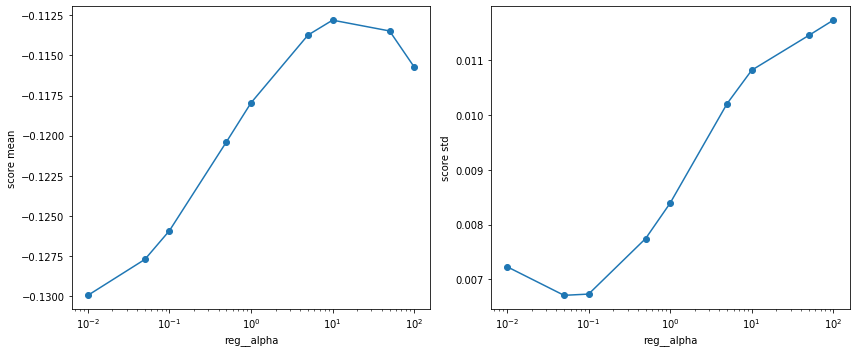

In [36]:
param = {"reg__alpha": [100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "reg__alpha", xlog=True)

In [37]:
reg = Pipeline(steps=[("sc", RobustScaler()), ("reg", Ridge(alpha=10, random_state=0))])
rmsle_cv(reg)

0.11278525432652182 +/- 0.010815551786317655


### Lasso

In [38]:
reg = Pipeline(steps=[("sc", RobustScaler()), ("reg", Lasso(random_state=0))])
rmsle_cv(reg)

0.3825627929888444 +/- 0.02027448380811121


{'reg__alpha': 0.0005}


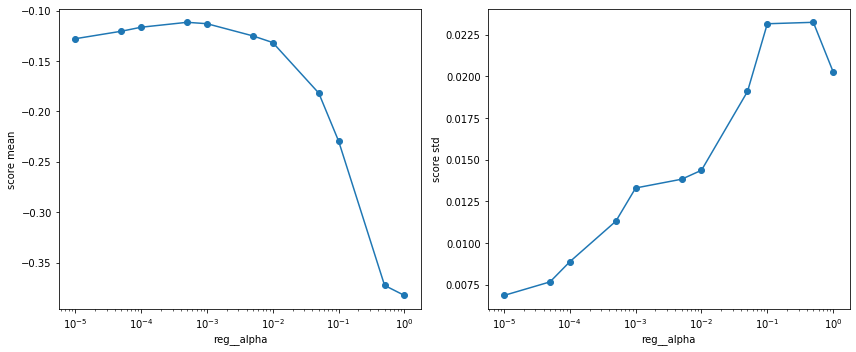

In [39]:
param = {"reg__alpha": [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "reg__alpha", xlog=True)

In [40]:
reg = Pipeline(steps=[("sc", RobustScaler()), ("reg", Lasso(alpha=0.0005, random_state=0))])
rmsle_cv(reg)

0.11162214742632467 +/- 0.011298694197631427


### ElasticNet

In [41]:
reg = Pipeline(steps=[("sc", RobustScaler()), ("reg", ElasticNet(random_state=0))])
rmsle_cv(reg)

0.3726831036722187 +/- 0.023227657233807562


{'reg__alpha': 0.001}


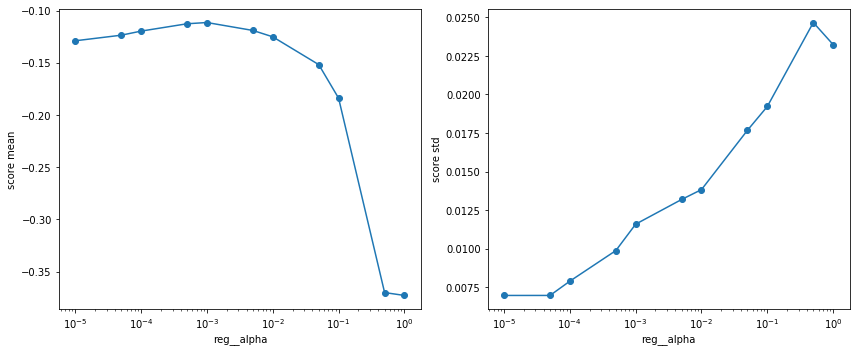

In [42]:
param = {"reg__alpha": [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "reg__alpha", xlog=True)

In [43]:
reg = Pipeline(steps=[("sc", RobustScaler()), ("reg", ElasticNet(alpha=0.001, random_state=0))])
rmsle_cv(reg)

0.11144566619098353 +/- 0.011588273493572745


### KernelRidge

In [44]:
reg = KernelRidge()
rmsle_cv(reg)

0.11779751065573567 +/- 0.008606172502145843


{'alpha': 10}


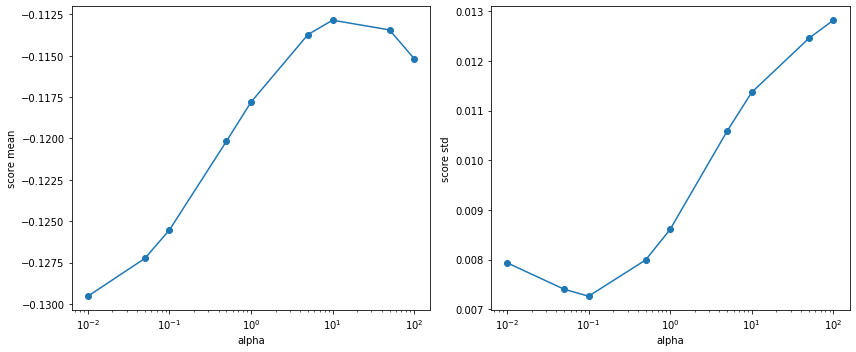

In [45]:
param = {"alpha": [100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "alpha", xlog=True)

In [46]:
reg = KernelRidge(alpha=10)
rmsle_cv(reg)

0.11284083591869713 +/- 0.011363763395633945


### RandomForest

In [47]:
reg = RandomForestRegressor(n_jobs=-1, random_state=0)
rmsle_cv(reg)

0.1479265063583747 +/- 0.015811160517670383


{'n_estimators': 800}


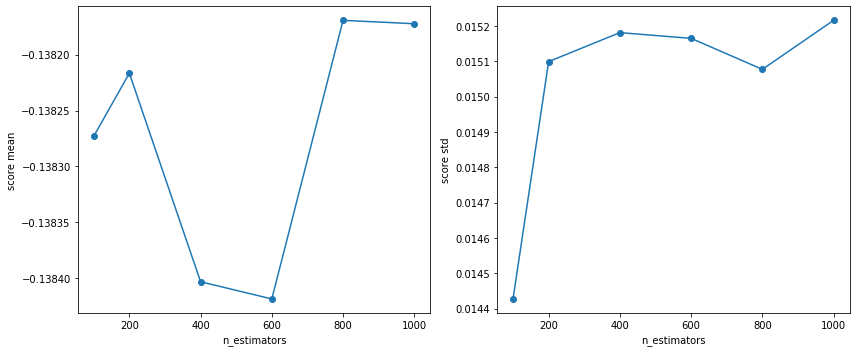

In [48]:
param = {"n_estimators": [100, 200, 400, 600, 800, 1000]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "n_estimators")

In [49]:
reg = RandomForestRegressor(n_estimators=800, n_jobs=-1, random_state=0)
rmsle_cv(reg)

0.13815937342033052 +/- 0.01507584279323242


{'max_features': 90}


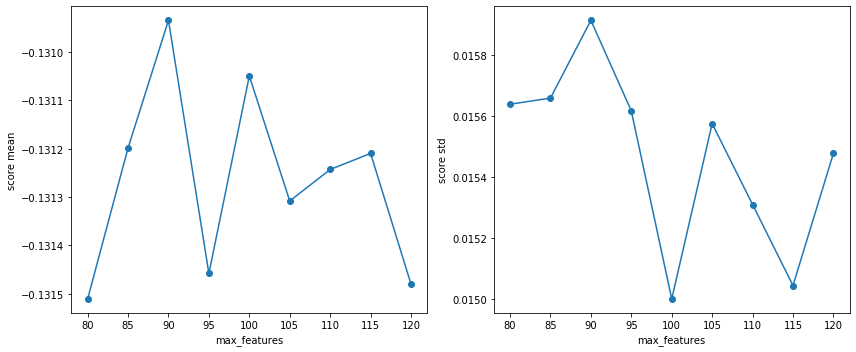

In [50]:
param = {"max_features": [80, 85, 90, 95, 100, 105, 110, 115, 120]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "max_features")

In [51]:
reg = RandomForestRegressor(n_estimators=800, max_features=90, n_jobs=-1,
                            random_state=0)
rmsle_cv(reg)

0.13092068504322552 +/- 0.01591040954286569


### GradientBoosting

In [52]:
reg = GradientBoostingRegressor(random_state=0)
rmsle_cv(reg)

0.12483645491952342 +/- 0.012004900544629089


In [53]:
param = {"n_estimators": [100, 200, 400, 600, 800, 1000],
         "max_features": [None, "sqrt"]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)

{'max_features': 'sqrt', 'n_estimators': 800}


In [54]:
reg = GradientBoostingRegressor(n_estimators=800, max_features="sqrt", random_state=0)
rmsle_cv(reg)

0.11482617302789774 +/- 0.01188498797200789


{'max_depth': 3}


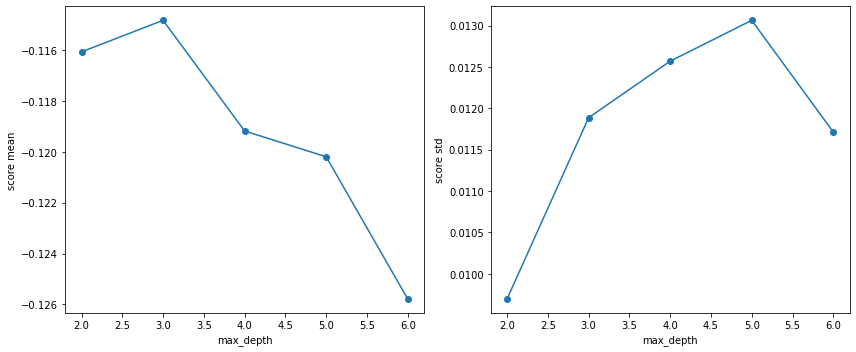

In [55]:
param = {"max_depth": [2, 3, 4, 5, 6]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "max_depth")

In [56]:
param = {"min_samples_leaf": [1, 3, 5, 7, 9],
         "min_samples_split": [2, 4, 6, 8, 10]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)

{'min_samples_leaf': 5, 'min_samples_split': 2}


In [57]:
reg = GradientBoostingRegressor(n_estimators=800, max_features="sqrt", min_samples_leaf=5,
                                random_state=0)
rmsle_cv(reg)

0.11384257787725556 +/- 0.009793381350470533


### XGBoost

In [58]:
reg = xgb.XGBRegressor(objective='reg:squarederror', nthread=-1, random_state=0)
rmsle_cv(reg)

0.12344069603041534 +/- 0.010564110884474094


{'n_estimators': 600}


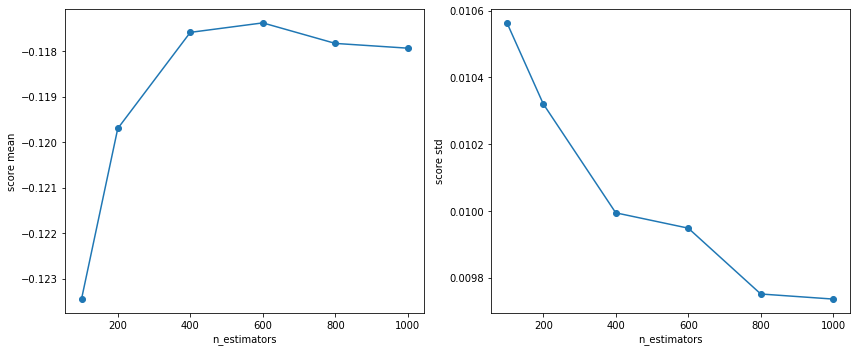

In [59]:
param = {"n_estimators": [100, 200, 400, 600, 800, 1000]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "n_estimators")

In [60]:
reg = xgb.XGBRegressor(n_estimators=600, objective='reg:squarederror', nthread=-1,
                       random_state=0)
rmsle_cv(reg)

0.11737149722941664 +/- 0.00994722212447388


{'max_depth': 3}


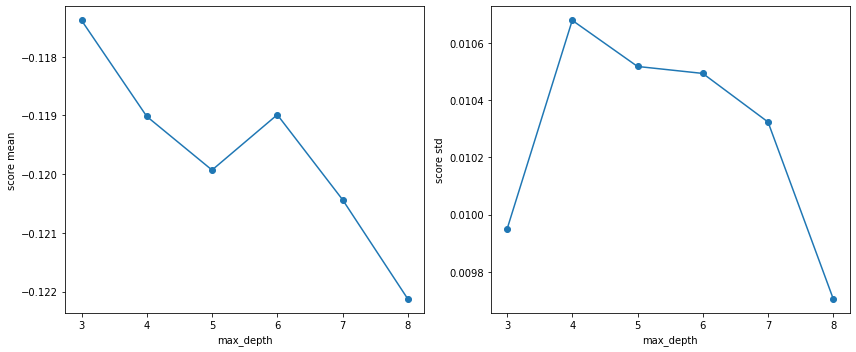

In [61]:
param = {"max_depth": [3, 4, 5, 6, 7, 8]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "max_depth")

{'gamma': 0}


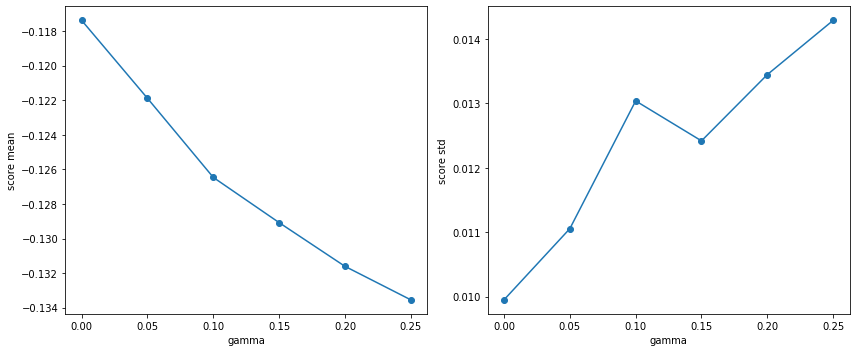

In [62]:
param = {"gamma": [0, 0.05, 0.1, 0.15, 0.2, 0.25]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "gamma")

{'subsample': 0.9}


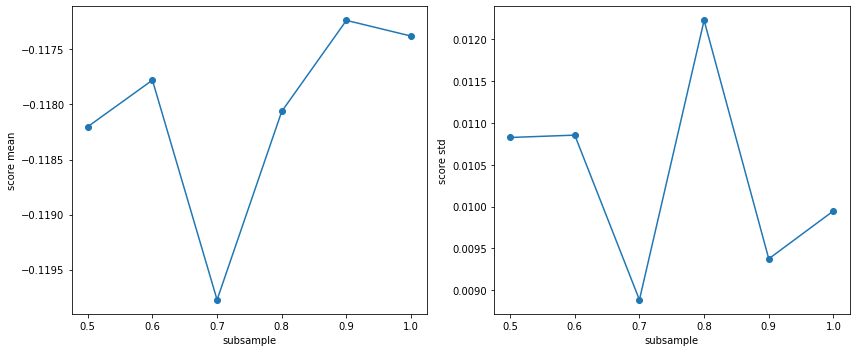

In [63]:
param = {"subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "subsample")

In [64]:
reg = xgb.XGBRegressor(n_estimators=600, objective='reg:squarederror',
                       subsample=0.9, nthread=-1, random_state=0)
rmsle_cv(reg)

0.11723012997094961 +/- 0.009374576514066497


{'colsample_bytree': 0.7}


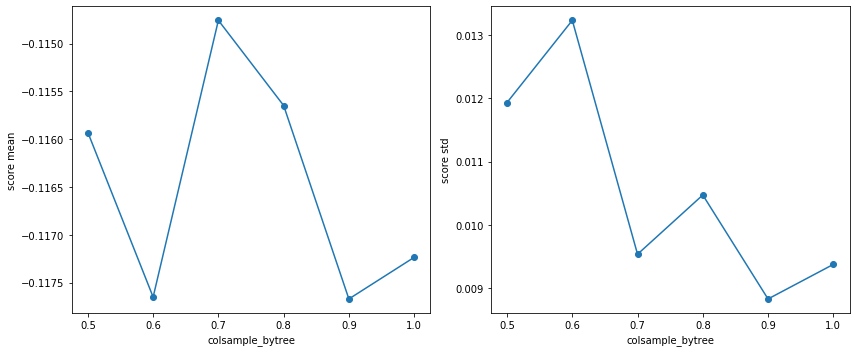

In [65]:
param = {"colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9, 1]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "colsample_bytree")

In [66]:
reg = xgb.XGBRegressor(n_estimators=600, objective='reg:squarederror',
                       subsample=0.9, colsample_bytree=0.7, nthread=-1,
                       random_state=0)
rmsle_cv(reg)

0.11474985085235268 +/- 0.009537680807535956


{'reg_alpha': 0}


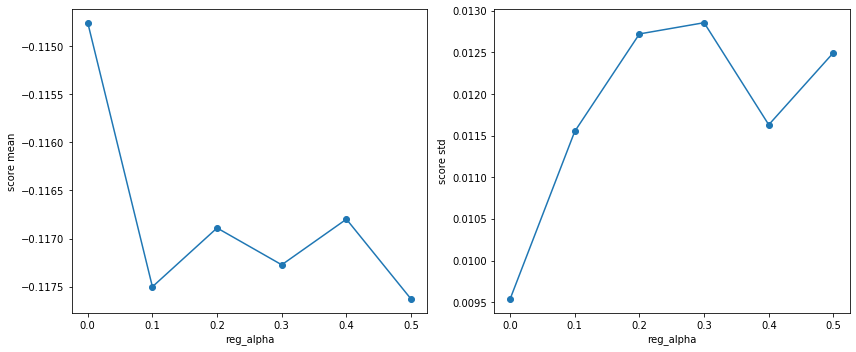

In [67]:
param = {"reg_alpha": [0, 0.1, 0.2, 0.3, 0.4, 0.5]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "reg_alpha")

{'reg_lambda': 1}


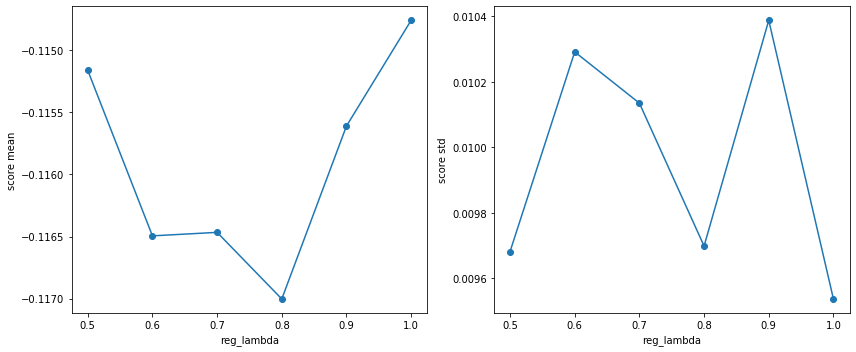

In [68]:
param = {"reg_lambda": [0.5, 0.6, 0.7, 0.8, 0.9, 1]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "reg_lambda")

### LightGBM

In [69]:
reg = lgb.LGBMRegressor(random_state=0, n_jobs=-1)
rmsle_cv(reg)

0.12686255857626277 +/- 0.013742099324617686


{'colsample_bytree': 0.2}


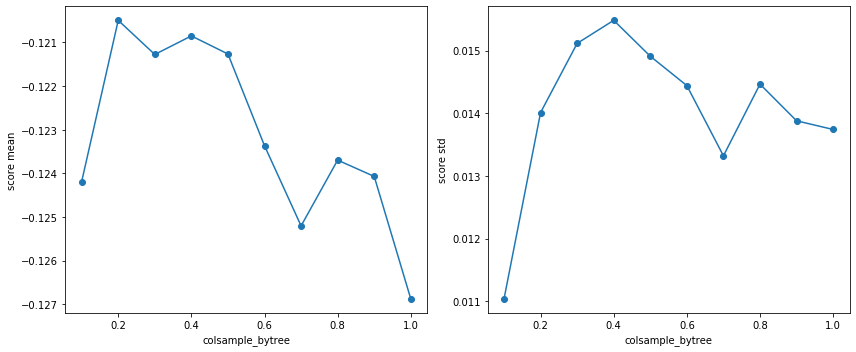

In [70]:
param = {"colsample_bytree": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)
plot_cv(param, bestreg, "colsample_bytree")

In [71]:
reg = lgb.LGBMRegressor(colsample_bytree=0.2, random_state=0, n_jobs=-1)
rmsle_cv(reg)

0.12047615203273962 +/- 0.014010848576137082


In [72]:
param = {"reg_alpha": [0, 0.1, 0.2, 0.3, 0.4, 0.5],
         "reg_lambda": [0, 0.1, 0.2, 0.3, 0.4, 0.5]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)

{'reg_alpha': 0.1, 'reg_lambda': 0}


In [73]:
reg = lgb.LGBMRegressor(colsample_bytree=0.2, reg_alpha=0.1, random_state=0,
                        n_jobs=-1)
rmsle_cv(reg)

0.1194511454701462 +/- 0.013518058109520809


In [74]:
param = {"max_depth": [-1, 3, 4, 5, 6, 7, 8, 9],
         "num_leaves": [5, 10, 15, 20, 25, 31]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)

{'max_depth': -1, 'num_leaves': 20}


In [75]:
reg = lgb.LGBMRegressor(colsample_bytree=0.2, reg_alpha=0.1, num_leaves=20,
                        random_state=0, n_jobs=-1)
rmsle_cv(reg)

0.1182136343536145 +/- 0.012224604004545083


In [76]:
param = {"n_estimators": [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
         "learning_rate": [0.05, 0.1]}
bestreg = GridSearchCV(reg, param,
                       cv=KFold(n_splits=5, shuffle=True, random_state=0),
                       scoring=rmse_scorer, n_jobs=-1)
bestreg.fit(X_train, y_train)
print(bestreg.best_params_)

{'learning_rate': 0.05, 'n_estimators': 400}


In [77]:
reg = lgb.LGBMRegressor(n_estimators=400, learning_rate=0.05,
                        colsample_bytree=0.2, reg_alpha=0.1, num_leaves=20,
                        random_state=0, n_jobs=-1)
rmsle_cv(reg)

0.11696634566828838 +/- 0.01439408690235845


### StackingRegressor

In [78]:
from sklearn.base import BaseEstimator, RegressorMixin, clone
from sklearn.model_selection import cross_val_predict

class StackingRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, estimators, final_estimator):
        self.estimators = estimators
        self.final_estimator = final_estimator

    def fit(self, X, y):
        self.estimators_ = []
        self.final_estimator_ = clone(self.final_estimator)
        kf = KFold(n_splits=5, shuffle=True, random_state=0)
        predictions = np.zeros((X.shape[0], len(self.estimators)))
        for i, model in enumerate(self.estimators):
            self.estimators_.append(clone(model).fit(X, y))
            predictions[:, i] = cross_val_predict(clone(model), X, y, cv=kf)
        self.final_estimator_.fit(predictions, y)
        return self

    def predict(self, X):
        predictions = np.zeros((X.shape[0], len(self.estimators)))
        for i, model in enumerate(self.estimators_):
            predictions[:, i] = model.predict(X)
        return self.final_estimator_.predict(predictions)

In [79]:
# 0.11279
reg1 = Pipeline(steps=[("sc", RobustScaler()), ("reg", Ridge(alpha=10, random_state=0))])
# 0.11162
reg2 = Pipeline(steps=[("sc", RobustScaler()), ("reg", Lasso(alpha=0.0005, random_state=0))])
# 0.11145
reg3 = Pipeline(steps=[("sc", RobustScaler()), ("reg", ElasticNet(alpha=0.001, random_state=0))])
# 0.11284
reg4 = KernelRidge(alpha=10)
# 0.13092
reg5 = RandomForestRegressor(n_estimators=800, max_features=90, n_jobs=-1,
                             random_state=0)
# 0.11384
reg6 = GradientBoostingRegressor(n_estimators=800, max_features="sqrt", min_samples_leaf=5,
                                 random_state=0)
# 0.11475
reg7 = xgb.XGBRegressor(n_estimators=600, objective='reg:squarederror',
                        subsample=0.9, colsample_bytree=0.7, nthread=-1,
                        random_state=0)
# 0.11697
reg8 = lgb.LGBMRegressor(n_estimators=400, learning_rate=0.05,
                         colsample_bytree=0.2, reg_alpha=0.1, num_leaves=20,
                         random_state=0, n_jobs=-1)

In [80]:
reg = StackingRegressor(estimators=[reg1, reg2, reg3, reg4, reg5, reg6, reg7, reg8],
                        final_estimator=RidgeCV(alphas=[0.1, 0.5, 1, 5, 10, 50, 100],
                                                cv=KFold(n_splits=5, shuffle=True, random_state=0),
                                                scoring=rmse_scorer))
rmsle_cv(reg)

0.10797587863035465 +/- 0.011757225553461348


In [81]:
reg.fit(X_train, y_train)
pred = np.expm1(reg.predict(X_test))

In [82]:
# cv score: 0.10798
# public score: 0.11709
submission = pd.DataFrame({"Id": test_ID, "SalePrice": pred},
                          columns=["Id", "SalePrice"])
submission.to_csv("submission/v1.csv", index=False)